In [1]:
# this is my code for "Challenge 1: Data Exploration" and 'Challenge 2: Machine Learning' 
# at course "Microsoft: DAT102x Data Science Professional Project"
# course url = https://courses.edx.org/courses/course-v1:Microsoft+DAT102x+2T2017/info

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# Challenge 1
# Download the Adventure Works data files and then review the information about the data in the next topic of this section.
sales = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Data_Science_Professional_Project/Challenge 1/AWSales.csv')
customers = pd.read_csv('C:/Users/t.bugaevskiy/Desktop/edX/10_DAT102x_Data_Science_Professional_Project/Challenge 1/AWCustomers.csv')

In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18361 entries, 0 to 18360
Data columns (total 24 columns):
CustomerID              18361 non-null int64
Title                   101 non-null object
FirstName               18361 non-null object
MiddleName              10572 non-null object
LastName                18361 non-null object
Suffix                  3 non-null object
AddressLine1            18361 non-null object
AddressLine2            311 non-null object
City                    18361 non-null object
StateProvinceName       18361 non-null object
CountryRegionName       18361 non-null object
PostalCode              18361 non-null object
PhoneNumber             18361 non-null object
BirthDate               18361 non-null object
Education               18361 non-null object
Occupation              18361 non-null object
Gender                  18361 non-null object
MaritalStatus           18361 non-null object
HomeOwnerFlag           18361 non-null int64
NumberCarsOwned         183

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18355 entries, 0 to 18354
Data columns (total 3 columns):
CustomerID       18355 non-null int64
BikeBuyer        18355 non-null int64
AvgMonthSpend    18355 non-null float64
dtypes: float64(1), int64(2)
memory usage: 430.3 KB


In [6]:
# Clean the data by replacing any missing values and removing duplicate rows. 
# In this dataset, each customer is identified by a unique customer ID.
trash = customers[['Title', 'FirstName', 'MiddleName', 'LastName', 'Suffix', 'AddressLine1', 'AddressLine2', 
                   'PostalCode', 'PhoneNumber']]
del customers['Title']
del customers['FirstName']
del customers['MiddleName']
del customers['LastName']
del customers['Suffix']
del customers['AddressLine1']
del customers['AddressLine2']
del customers['PostalCode']
del customers['PhoneNumber']

In [7]:
# converting mapped data to category type
customers.CountryRegionName = customers.CountryRegionName.astype('category')
customers.Education = customers.Education.astype('category')
customers.Occupation = customers.Occupation.astype('category')
customers.Gender = customers.Gender.astype('category')
customers.MaritalStatus = customers.MaritalStatus.astype('category')
customers.City = customers.City.astype('category')
customers.StateProvinceName = customers.StateProvinceName.astype('category')

In [8]:
customers = customers.dropna()
sales = sales.dropna()

# drop duplicates
customers['LastUpdated1'] = pd.to_datetime(customers.LastUpdated, format = '%Y-%m-%d')
customers = customers.sort(columns = 'LastUpdated')
customers = customers.drop_duplicates(subset = ['CustomerID'], keep = 'last')
del customers['LastUpdated1']
customers = customers.sort_index()
sales = sales.drop_duplicates()
customers = customers.reset_index(drop=True)

C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [63]:
# Explore the data by calculating summary and descriptive statistics for the features in the dataset, 
# calculating correlations between features, and creating data visualizations to determine apparent relationships in the data.
customers.describe()

,StateProvinceName,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,YearlyIncome,Age,Cars,Children
count,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000
mean,23.160774,3.099373,1.693054,2.105639,0.505857,0.458186,0.610569,1.270390,72758.950041,34.583547,0.786216,0.289948
std,17.621272,1.993188,1.361784,1.588825,0.499979,0.498262,0.487634,0.913887,30687.664358,11.256344,0.409987,0.453750
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25435.000000,16.000000,0.000000,0.000000
25%,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,53312.500000,26.000000,1.000000,0.000000
50%,15.000000,4.000000,2.000000,2.000000,1.000000,0.000000,1.000000,1.000000,61851.000000,33.000000,1.000000,0.000000
75%,37.000000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,2.000000,87412.000000,42.000000,1.000000,1.000000
max,53.000000,5.000000,4.000000,4.000000,1.000000,1.000000,1.000000,5.000000,139115.000000,86.000000,1.000000,1.000000


In [62]:
sales.describe()

,BikeBuyer,AvgMonthSpend
count,18355.00000,18355.000000
mean,0.55173,51.767207
std,0.49733,3.438024
min,0.00000,44.100000
25%,0.00000,49.410000
50%,1.00000,51.420000
75%,1.00000,53.600000
max,1.00000,65.290000


In [10]:
mergedf = pd.merge(customers, sales, how='left', on=['CustomerID'])
mergedf.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,BikeBuyer,AvgMonthSpend
count,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.000000,18355.00000,18355.000000
mean,20241.349387,0.610569,1.270390,0.338218,0.850449,72758.950041,0.55173,51.767207
std,5336.539868,0.487634,0.913887,0.569001,0.927363,30687.664358,0.49733,3.438024
min,11000.000000,0.000000,0.000000,0.000000,0.000000,25435.000000,0.00000,44.100000
25%,15620.500000,0.000000,1.000000,0.000000,0.000000,53312.500000,0.00000,49.410000
50%,20246.000000,1.000000,1.000000,0.000000,0.000000,61851.000000,1.00000,51.420000
75%,24863.500000,1.000000,2.000000,1.000000,2.000000,87412.000000,1.00000,53.600000
max,29483.000000,1.000000,5.000000,3.000000,3.000000,139115.000000,1.00000,65.290000


In [11]:
def plotstats(df, col):
    import matplotlib.pyplot as plt
    ## Setup for ploting two charts one over the other
    fig, ax = plt.subplots(2, 1, figsize = (12,8))
    
    ## First a box plot
    df.dropna().boxplot(col, ax = ax[0], vert=False,
                        return_type='dict')
    ## Plot the histogram   
    temp = df[col].as_matrix()
    ax[1].hist(temp, bins = 30, alpha = 0.7)
    plt.xlabel(col)
    return [col]

['NumberCarsOwned']

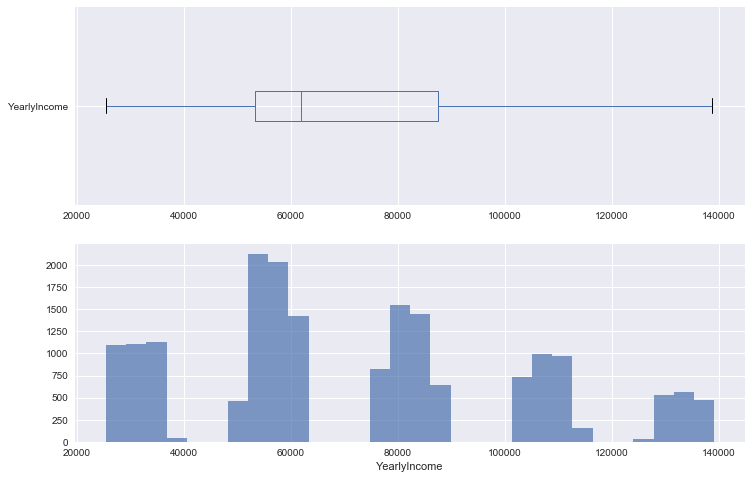

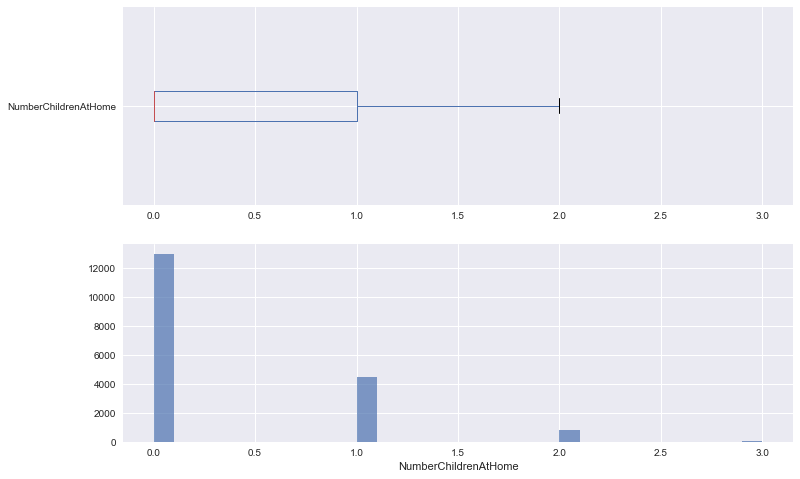

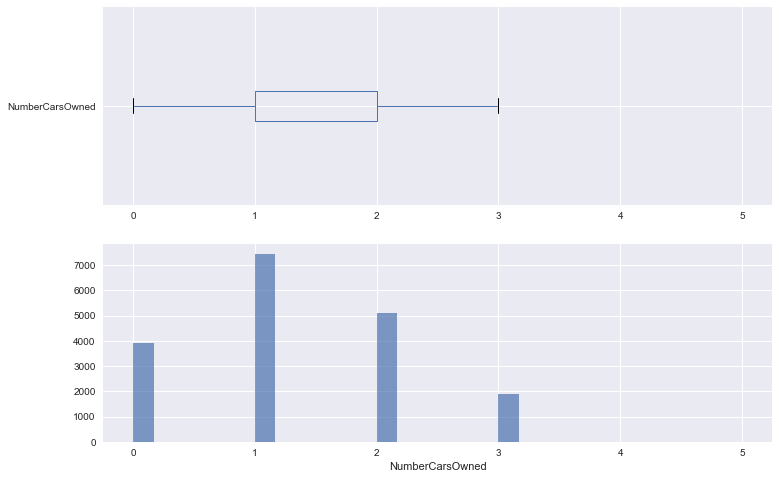

In [12]:
%matplotlib inline
plotstats(customers, 'YearlyIncome')
plotstats(customers, 'NumberChildrenAtHome')
plotstats(customers, 'NumberCarsOwned')
#TODO group income to 5 groups and make it categorical
#todo make new car category "3 and more"

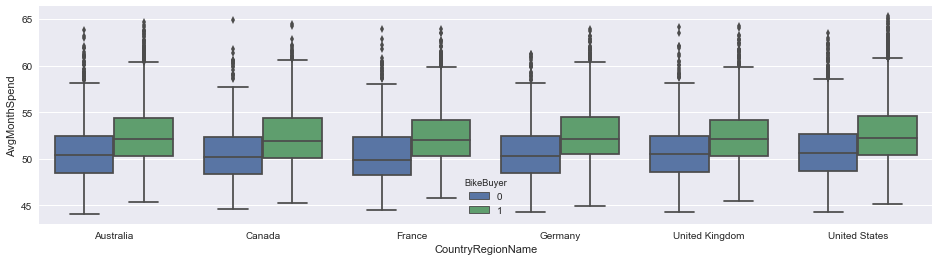

In [13]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.CountryRegionName, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

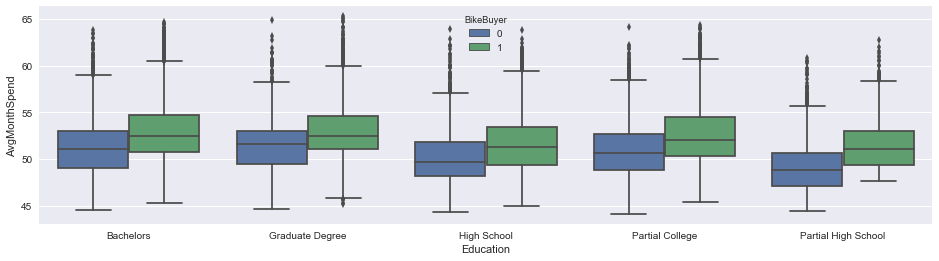

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.Education, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

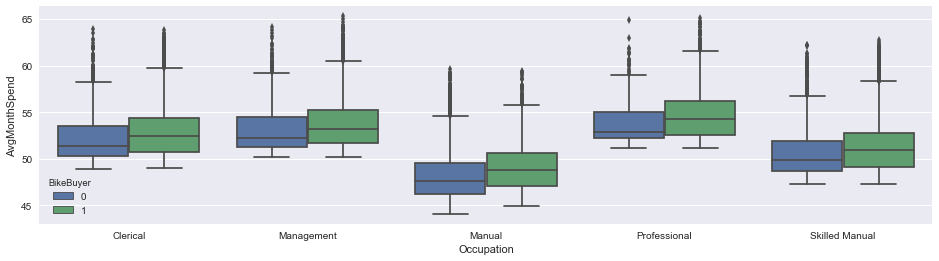

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.Occupation, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

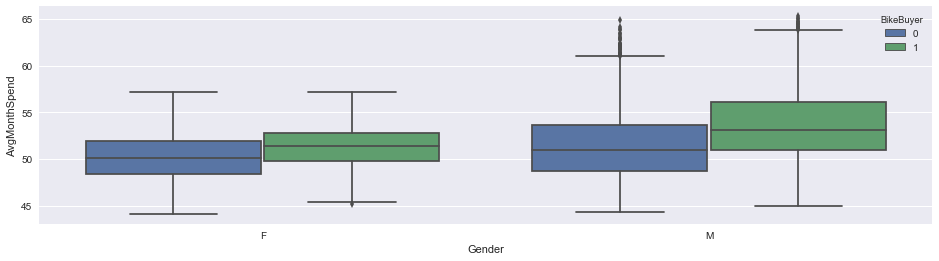

In [16]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.Gender, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

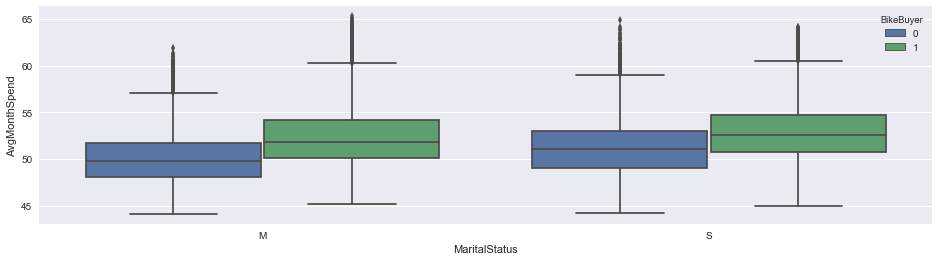

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (16,4))
sns.boxplot(x = customers.MaritalStatus, y = sales.AvgMonthSpend, hue=sales.BikeBuyer)

In [18]:
# question 1 Enter the following summary statistics you calculated for the AvgMonthSpend column.
sales.AvgMonthSpend.min()

44.100000000000001

In [19]:
# Maximum AvgMonthSpend
sales.AvgMonthSpend.max()

65.290000000000006

In [20]:
# Mean AvgMonthSpend
sales.AvgMonthSpend.mean()

51.76720675565248

In [21]:
# Median AvgMonthSpend
sales.AvgMonthSpend.median()

51.42

In [22]:
# Standard Deviation of AvgMonthSpend
sales.AvgMonthSpend.std()

3.438024087583443

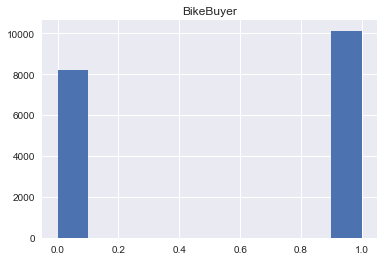

1    10127
0     8228
Name: BikeBuyer, dtype: int64

In [23]:
# Distribution of BikeBuyer
# A Boolean flag indicating whether a customer has previously purchased a bike (1) or not (0).
plt.show(sales.hist(column = 'BikeBuyer'))
sales.BikeBuyer.value_counts()

In [24]:
#YearlyIncome By Occupation
customers.YearlyIncome.groupby(customers.Occupation).median().sort_values()

Occupation
Manual             31151
Skilled Manual     56547
Clerical           81964
Management        107633
Professional      133057
Name: YearlyIncome, dtype: int64

In [25]:
sales.AvgMonthSpend.groupby(customers.Occupation).median().sort_values()

Occupation
Manual            47.99
Skilled Manual    50.49
Clerical          52.08
Management        52.92
Professional      53.77
Name: AvgMonthSpend, dtype: float64

In [26]:
# Which group of customers accounts for a distinctly high range of AvgMonthSpend values?
# a) Females aged between 19 and 25
# b) Males aged between 19 and 25
# c) Females aged between 30 and 50
# d) Males aged between 30 and 50

from datetime import datetime
from dateutil.relativedelta import relativedelta

for i in customers.index:
    customers.at[i, 'BirthDate'] = datetime.strptime(customers.ix[i, 'BirthDate'], '%Y-%m-%d')
    
for i in customers.index:
    customers.at[i, 'LastUpdated'] = datetime.strptime(customers.ix[i, 'LastUpdated'], '%Y-%m-%d')
    
for i in customers.index:
    customers.at[i, 'Age'] = relativedelta(customers.ix[i, 'LastUpdated'], customers.ix[i, 'BirthDate']).years
customers.Age.unique()

array([ 29.,  44.,  31.,  39.,  42.,  45.,  19.,  40.,  18.,  35.,  32.,
        56.,  25.,  51.,  24.,  53.,  36.,  55.,  20.,  27.,  26.,  33.,
        30.,  38.,  28.,  34.,  21.,  22.,  50.,  23.,  59.,  17.,  46.,
        48.,  49.,  41.,  57.,  58.,  54.,  43.,  47.,  37.,  52.,  16.,
        62.,  61.,  83.,  60.,  64.,  63.,  77.,  66.,  65.,  75.,  73.,
        67.,  71.,  72.,  70.,  68.,  74.,  80.,  69.,  84.,  79.,  86.,
        76.,  78.,  85.,  81.])

In [27]:
def LongLife(customers):
    if  19 <= customers['Age'] <= 25:
        return 1
    elif 30 <= customers['Age'] <= 50:
        return 2
    else:
        return 0

customers['AgeGroup'] = customers.apply(LongLife, axis=1)
customers['AgeGroup'].unique()

array([0, 2, 1], dtype=int64)

In [28]:
sales.AvgMonthSpend.groupby([customers.Gender, customers.AgeGroup]).mean().sort_values()
# answear: b) Males aged between 19 and 25

Gender  AgeGroup
M       1           50.284333
F       1           50.332873
        2           50.653160
M       0           50.895467
F       0           50.976423
M       2           54.779276
Name: AvgMonthSpend, dtype: float64

['Age']

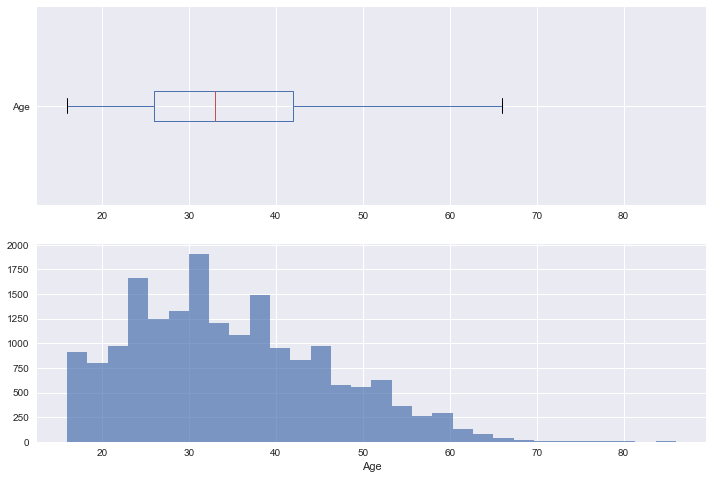

In [29]:
%matplotlib inline
plotstats(customers, 'Age')

In [30]:
# Which of the following statements about AvgMonthSpend are true?
# A) Married customers have a higher median AvgMonthSpend than single customers.
sales.AvgMonthSpend.groupby(customers.MaritalStatus).median().sort_values()
# answear: True

MaritalStatus
M    51.15
S    51.78
Name: AvgMonthSpend, dtype: float64

In [31]:
# Which of the following statements about AvgMonthSpend are true?
# B) Customers with no car have a higher median AvgMonthSpend than customers with one or more cars.

def Car(customers):
  if customers['NumberCarsOwned'] == 0:
    return 0
  else:
    return 1

customers['Cars'] = customers.apply(Car, axis=1)

sales.AvgMonthSpend.groupby(customers.Cars).median().sort_values()
# answear: False

Cars
0    50.25
1    51.68
Name: AvgMonthSpend, dtype: float64

In [32]:
# Which of the following statements about AvgMonthSpend are true?
# C) Male customers have a higher median AvgMonthSpend than female customers.
sales.AvgMonthSpend.groupby(customers.Gender).median().sort_values()
# answear: False

Gender
F    50.76
M    52.28
Name: AvgMonthSpend, dtype: float64

In [33]:
# Which of the following statements about AvgMonthSpend are true?
# D) Female customers have a wider range of AvgMonthSpend values than male customers.
# sales.AvgMonthSpend.groupby(customers.Gender).max() - sales.AvgMonthSpend.groupby(customers.Gender).min()
# answear: True

In [34]:
# Which of the following statements about AvgMonthSpend are true?
# E) Customers with no children at home have a lower median AvgMonthSpend values 
#    than customers with one or more children at home.

def Children(customers):
  if customers['NumberChildrenAtHome'] == 0:
    return 0
  else:
    return 1

customers['Children'] = customers.apply(Children, axis=1)

sales.AvgMonthSpend.groupby(customers.Children).median().sort_values()
# answear: True

Children
0    51.100
1    52.235
Name: AvgMonthSpend, dtype: float64

In [35]:
# Which of the following statements about BikeBuyer are true?
# a) The median YearlyIncome is higher for customers who bought a bike than for customers who didn't.
customers.YearlyIncome.groupby(sales.BikeBuyer).median().sort_values()
# answear: True

BikeBuyer
0    57781
1    79484
Name: YearlyIncome, dtype: int64

In [36]:
# Which of the following statements about BikeBuyer are true?
# b) The median number of cars owned by customers who bought a bike is lower than for customers who didn't.
customers.NumberCarsOwned.groupby(sales.BikeBuyer).median().sort_values()
# answear: False

BikeBuyer
0    1
1    2
Name: NumberCarsOwned, dtype: int64

In [37]:
# Which of the following statements about BikeBuyer are true?
# c) The most common occupation type for customers who bought a bike is skilled manual.
customers.Occupation.groupby([sales.BikeBuyer]).value_counts().sort_values()
# answear: True

BikeBuyer  Occupation    
0          Professional       510
1          Manual             886
0          Management         945
1          Professional      1093
0          Clerical          1612
1          Management        1913
0          Manual            2489
           Skilled Manual    2672
1          Clerical          2849
           Skilled Manual    3386
Name: Occupation, dtype: int64

In [38]:
# Which of the following statements about BikeBuyer are true?
# d)  Most of the customers who bought a bike are male.
customers.Gender.groupby(sales.BikeBuyer).value_counts().sort_values()
# answear: False

BikeBuyer  Gender
0          M         3632
1          F         4474
0          F         4596
1          M         5653
Name: Gender, dtype: int64

In [39]:
# Which of the following statements about BikeBuyer are true?
# d) Most of the customers who bought a bike are single
customers.MaritalStatus.groupby(sales.BikeBuyer).value_counts().sort_values()
# answear: False

BikeBuyer  MaritalStatus
0          M                3597
1          S                3779
0          S                4631
1          M                6348
Name: MaritalStatus, dtype: int64

In [40]:
#del customers['Age']
del customers['AgeGroup']

#del customers['Cars']

del customers['TotalChildren']
del customers['NumberChildrenAtHome']
#del customers['Children']

del customers['LastUpdated']
del customers['BirthDate']
del customers['City']

In [41]:
customers.columns

Index(['CustomerID', 'StateProvinceName', 'CountryRegionName', 'Education',
       'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag',
       'NumberCarsOwned', 'YearlyIncome', 'Age', 'Cars', 'Children'],
      dtype='object')

In [42]:
sales.columns

Index(['CustomerID', 'BikeBuyer', 'AvgMonthSpend'], dtype='object')

C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\t.bugaevskiy\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:32: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


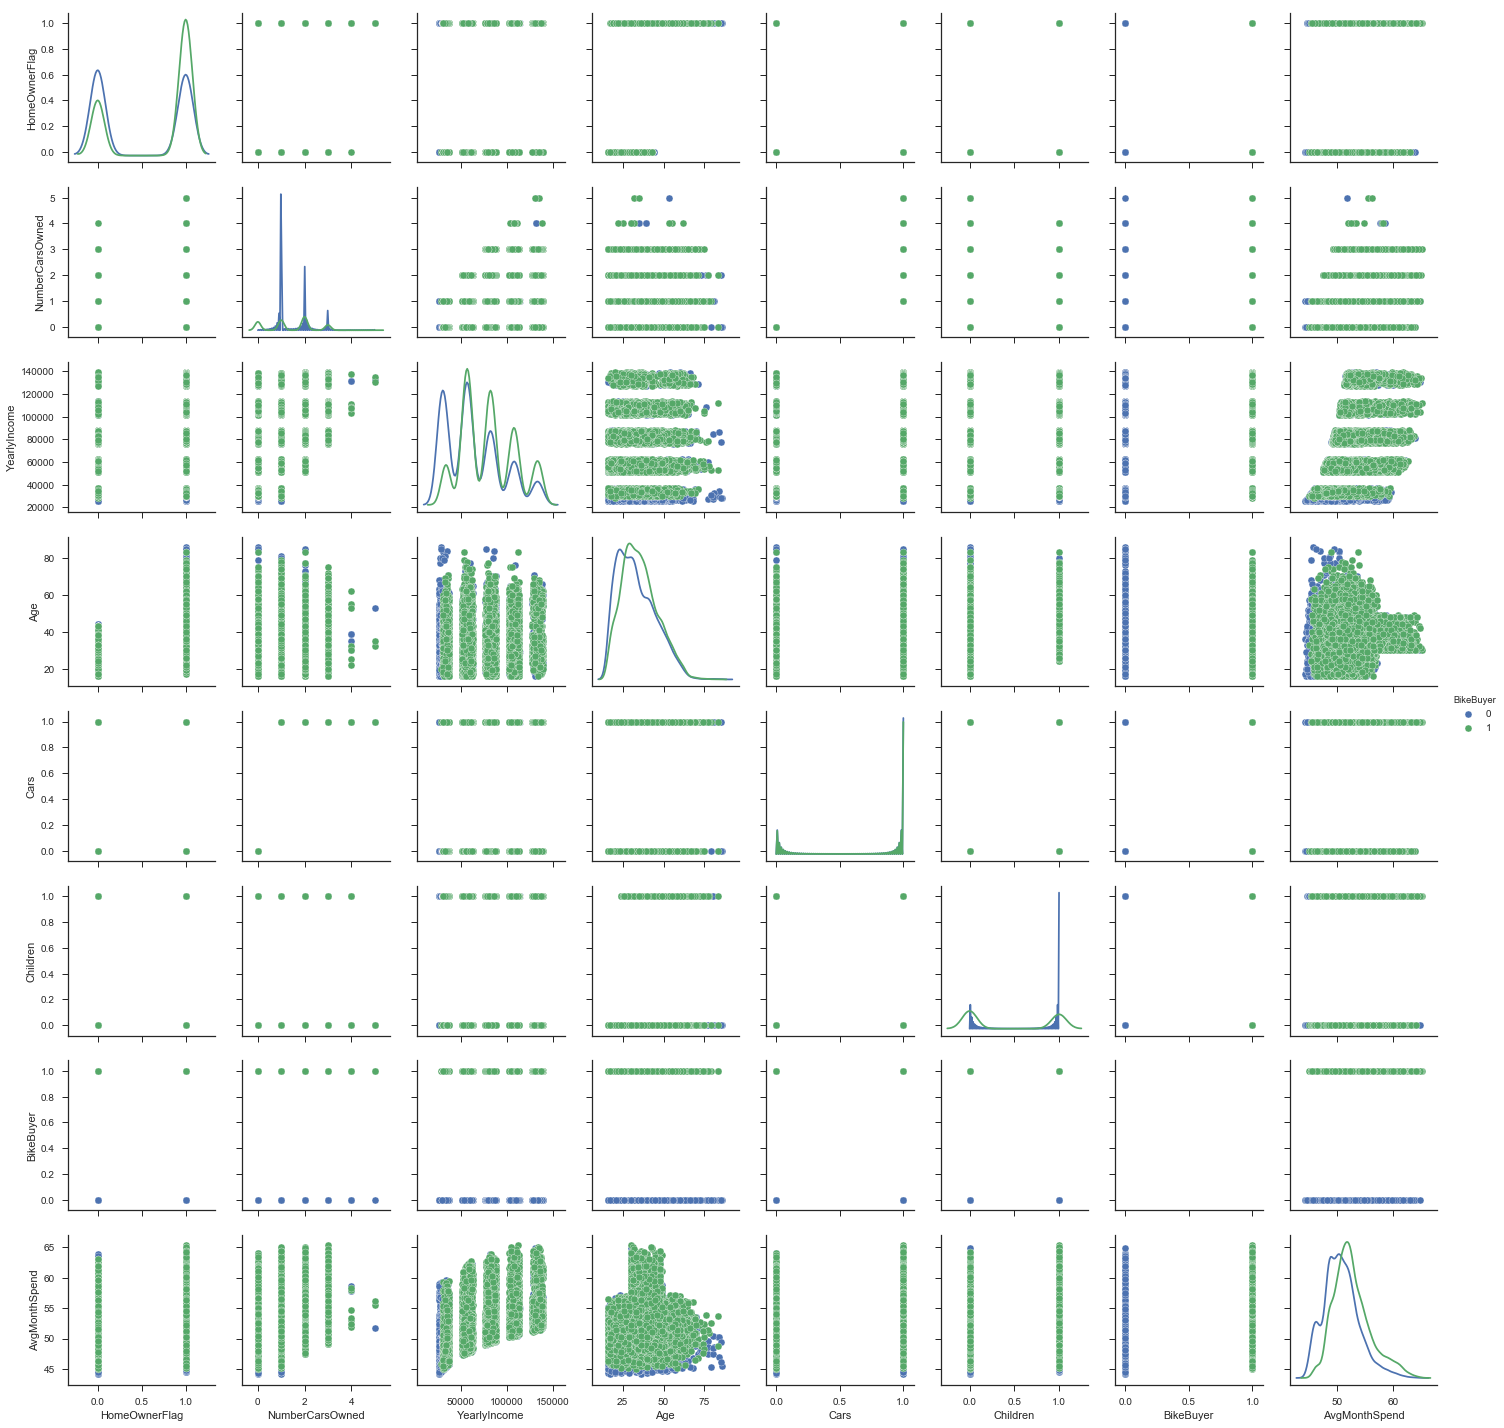

In [43]:
# visualization
mergedf = pd.merge(customers, sales, how='left', on=['CustomerID'])
mergedf = mergedf.set_index('CustomerID')
sns.set(style="ticks", color_codes=True)
plt.show(sns.pairplot(mergedf, diag_kind="kde", hue="BikeBuyer"))

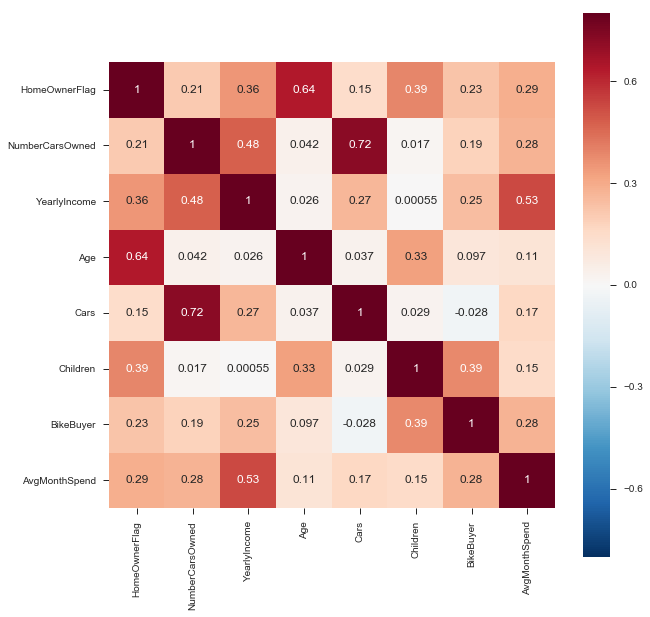

In [44]:
# correlation
fig, ax = plt.subplots(figsize=(10,10))
plt.show(sns.heatmap(mergedf.corr(), vmax=.8, square=True, annot=True))

In [46]:
# Challenge 2
# 1. Use the Adventure Works Cycles customer data you worked with in challenge 1 
# to create a classification model that predicts whether or not a customer will purchase a bike. 
# The model should predict bike purchasing for new customers for whom no information
# about average monthly spend or previous bike purchases is available. Refine your model to optimize its accuracy.

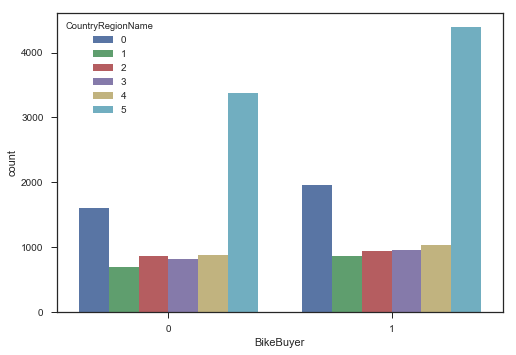

In [66]:
plt.show(sns.countplot(sales.BikeBuyer, hue=customers.CountryRegionName))
# TODO annotation

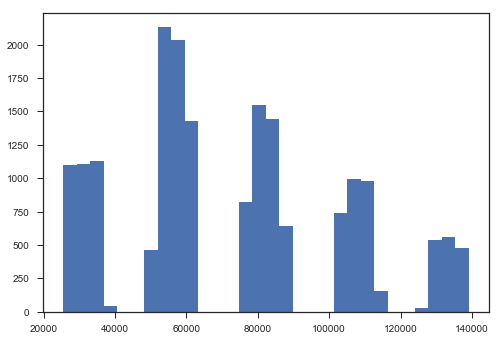

In [47]:
plt.show(plt.hist(customers.YearlyIncome, bins = 30))

In [48]:
customers = customers.set_index('CustomerID')
sales = sales.set_index('CustomerID')

In [49]:
customers.columns

Index(['StateProvinceName', 'CountryRegionName', 'Education', 'Occupation',
       'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned',
       'YearlyIncome', 'Age', 'Cars', 'Children'],
      dtype='object')

In [50]:
cat_columns = customers.select_dtypes(['category']).columns
customers[cat_columns] = customers[cat_columns].apply(lambda x: x.cat.codes)

In [51]:
BikeBuyer = sales['BikeBuyer']

In [52]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(customers, BikeBuyer, test_size=0.5, random_state=7)

In [53]:
from sklearn.svm import SVC
svc = SVC(kernel='linear', C = 1)
svc = svc.fit(data_train, label_train)
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4], 'C': [1, 10, 100, 1000]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [77]:
from sklearn.metrics import (accuracy_score, precision_score, average_precision_score, recall_score, f1_score)

print('Score: ', (svc.score(data_test, label_test))*100, '%')
print('Accuracy score: ', (accuracy_score(svc.predict(data_test), label_test))*100, '%')
print('Precision score: ', (precision_score(svc.predict(data_test), label_test))*100, '%')
print('Average precision score: ', (average_precision_score(svc.predict(data_test), label_test))*100, '%')
print('Recall score: ', (recall_score(svc.predict(data_test), label_test))*100, '%')
print('Recall score binary: ', (recall_score(svc.predict(data_test), label_test, average='binary'))*100, '%')
print('F1 score: ', (f1_score(svc.predict(data_test), label_test))*100, '%')
print('F1 score binary: ', (f1_score(svc.predict(data_test), label_test, average='binary'))*100, '%')

Score:  66.0492482022 %
Accuracy score:  66.0492482022 %
Precision score:  85.159637367 %
Average precision score:  87.7764526737 %
Recall score:  64.6469180132 %
Recall score binary:  64.6469180132 %
F1 score:  73.4988943698 %
F1 score binary:  73.4988943698 %


In [55]:
# DAT210x Lab06.1 - Final

In [56]:
from sklearn.metrics import confusion_matrix
confusion_matrix(svc.predict(data_test), label_test)

array([[1741,  753],
       [2363, 4321]])

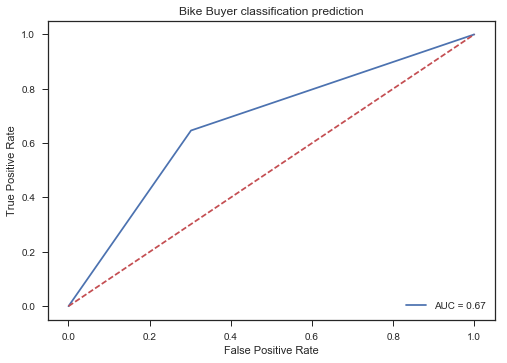

In [106]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(svc.predict(data_test), label_test)
roc_auc = auc(fpr, tpr)

plt.title('Bike Buyer classification prediction')
plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=30, max_depth=10, oob_score=True, random_state=0)
rfc = rfc.fit(data_train, label_train)
print("Score :",(rfc.score(data_test, label_test))*100,"%")
print(confusion_matrix(rfc.predict(data_test), label_test))

Score : 79.4072782741 %
[[2878  664]
 [1226 4410]]


In [58]:
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
n_estimators = 30
RANDOM_SEED = 13 # fix the seed on each iteration
max_depth = 10
oob_score=True
random_state=0

models = [DecisionTreeClassifier(max_depth=max_depth, random_state=random_state),
          RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, oob_score=oob_score, random_state=random_state),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for model in models:
        # Train
        clf = clone(model)
        clf = model.fit(data_train, label_train)

        scores = clf.score(data_test, label_test)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print( model_details + "has a score of", scores )

DecisionTreehas a score of 0.777947265199
RandomForest with 30 estimatorshas a score of 0.794072782741
ExtraTrees with 30 estimatorshas a score of 0.751035083896
AdaBoost with 30 estimatorshas a score of 0.78895184136


DecisionTree
[[1741  753]
 [2363 4321]]
DecisionTreehas a score of 0.777947265199
Score:  77.7947265199 %
Accuracy score:  77.7947265199 %
Precision score:  84.0362633031 %
Average precision score:  87.528144274 %
Recall score:  77.640203933 %
Recall score binary:  77.640203933 %
F1 score:  80.7117168276 %
F1 score binary:  80.7117168276 %



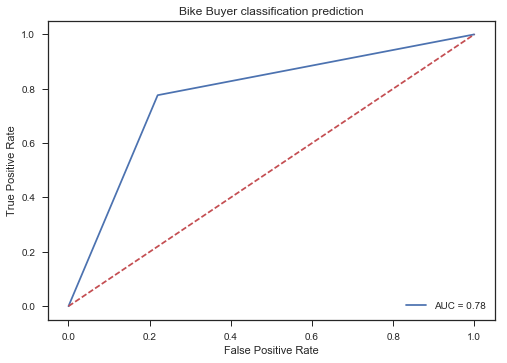

RandomForest with 30 estimators
[[1741  753]
 [2363 4321]]
RandomForest with 30 estimatorshas a score of 0.794072782741
Score:  79.4072782741 %
Accuracy score:  79.4072782741 %
Precision score:  86.9136775719 %
Average precision score:  89.2593456601 %
Recall score:  78.2469836764 %
Recall score binary:  78.2469836764 %
F1 score:  82.3529411765 %
F1 score binary:  82.3529411765 %



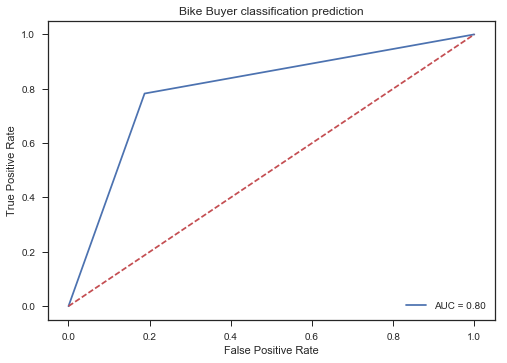

ExtraTrees with 30 estimators
[[1741  753]
 [2363 4321]]
ExtraTrees with 30 estimatorshas a score of 0.751361952495
Score:  75.1361952495 %
Accuracy score:  75.1361952495 %
Precision score:  78.2420181317 %
Average precision score:  84.0971927814 %
Recall score:  77.1173271173 %
Recall score binary:  77.1173271173 %
F1 score:  77.6756016435 %
F1 score binary:  77.6756016435 %



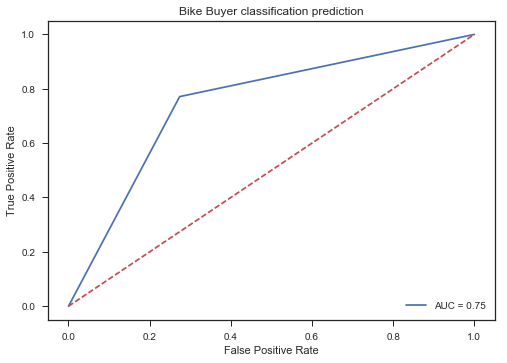

AdaBoost with 30 estimators
[[1741  753]
 [2363 4321]]
AdaBoost with 30 estimatorshas a score of 0.78895184136
Score:  78.895184136 %
Accuracy score:  78.895184136 %
Precision score:  85.1990540008 %
Average precision score:  88.2964256074 %
Recall score:  78.4715919405 %
Recall score binary:  78.4715919405 %
F1 score:  81.6970613248 %
F1 score binary:  81.6970613248 %



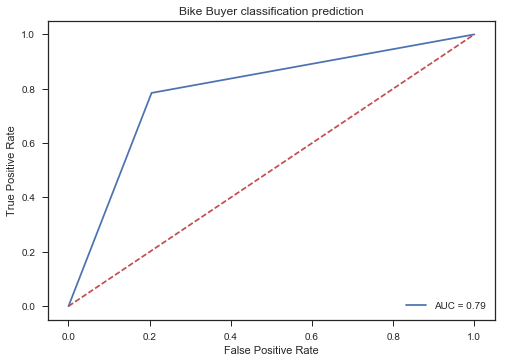

In [107]:
from sklearn import clone
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, average_precision_score, recall_score, f1_score)
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

# Parameters
n_classes = 3
n_estimators = 30
RANDOM_SEED = 13 # fix the seed on each iteration
max_depth = 10
oob_score=True
random_state=0

models = [DecisionTreeClassifier(max_depth=max_depth, random_state=random_state),
          RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, oob_score=oob_score, random_state=random_state),
          ExtraTreesClassifier(n_estimators=n_estimators),
          AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),
                             n_estimators=n_estimators)]

for model in models:
        # Train
        clf = clone(model)
        clf = model.fit(data_train, label_train)

        scores = clf.score(data_test, label_test)
        # Create a title for each column and the console by using str() and
        # slicing away useless parts of the string
        model_title = str(type(model)).split(".")[-1][:-2][:-len("Classifier")]
        model_details = model_title
        if hasattr(model, "estimators_"):
            model_details += " with {} estimators".format(len(model.estimators_))
        print(model_details)
        print(confusion_matrix(svc.predict(data_test), label_test))
        print( model_details + "has a score of", scores )
        print('Score: ', (clf.score(data_test, label_test))*100, '%')
        print('Accuracy score: ', (accuracy_score(clf.predict(data_test), label_test))*100, '%')
        print('Precision score: ', (precision_score(clf.predict(data_test), label_test))*100, '%')
        print('Average precision score: ', (average_precision_score(clf.predict(data_test), label_test))*100, '%')
        print('Recall score: ', (recall_score(clf.predict(data_test), label_test))*100, '%')
        print('Recall score binary: ', (recall_score(clf.predict(data_test), label_test, average='binary'))*100, '%')
        print('F1 score: ', (f1_score(clf.predict(data_test), label_test))*100, '%')
        print('F1 score binary: ', (f1_score(clf.predict(data_test), label_test, average='binary'))*100, '%')
        print()
        
        fpr, tpr, thresholds = roc_curve(clf.predict(data_test), label_test)
        roc_auc = auc(fpr, tpr)

        plt.title('Bike Buyer classification prediction')
        plt.plot(fpr, tpr, label='AUC = %0.2f'% roc_auc)
        plt.legend(loc='lower right')
        plt.plot([0,1],[0,1],'r--')
        plt.ylabel('True Positive Rate')
        plt.xlabel('False Positive Rate')
        plt.show()

In [ ]:
# 2. Next, create a regression model that predicts a customer's average monthly spend.
# The model should predict average monthly spend for new customers for whom no information 
# about average monthly spend or previous bike purchases is available. Refine your model to optimize its RMSE.

In [ ]:
# 3. Download the test data. This data includes customer features but does not include 
# bike purchasing or average monthly spend values.
# url for test data: https://d37djvu3ytnwxt.cloudfront.net/assets/courseware/v1/0ed4110508d6130faefbb21410b0d0fc/asset-v1:Microsoft+DAT102x+2T2017+type@asset+block/AWTest.zip

In [ ]:
# 4. Test your models using the corresponding test dataset, and enter your predictions
# in the following topic in this sections to score your models.
# Note that you can submit your predictions a maximum of 10 times for each model